<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   diagnosis   569 non-null    int64  
 1   feature_1   569 non-null    float64
 2   feature_2   569 non-null    float64
 3   feature_3   569 non-null    float64
 4   feature_4   569 non-null    float64
 5   feature_5   569 non-null    float64
 6   feature_6   569 non-null    float64
 7   feature_7   569 non-null    float64
 8   feature_8   569 non-null    float64
 9   feature_9   569 non-null    float64
 10  feature_10  569 non-null    float64
 11  feature_11  569 non-null    float64
 12  feature_12  569 non-null    float64
 13  feature_13  569 non-null    float64
 14  feature_14  569 non-null    float64
 15  feature_15  569 non-null    float64
 16  feature_16  569 non-null    float64
 17  feature_17  569 non-null    float64
 18  feature_18  569 non-null    float64
 19  feature_19  569 non-null    f

<ipython-input-6-602fd3567763>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='coolwarm')


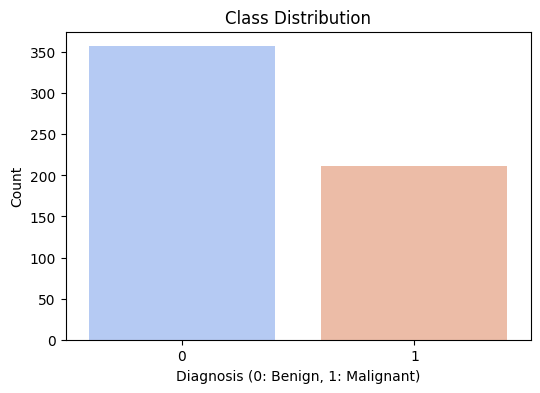

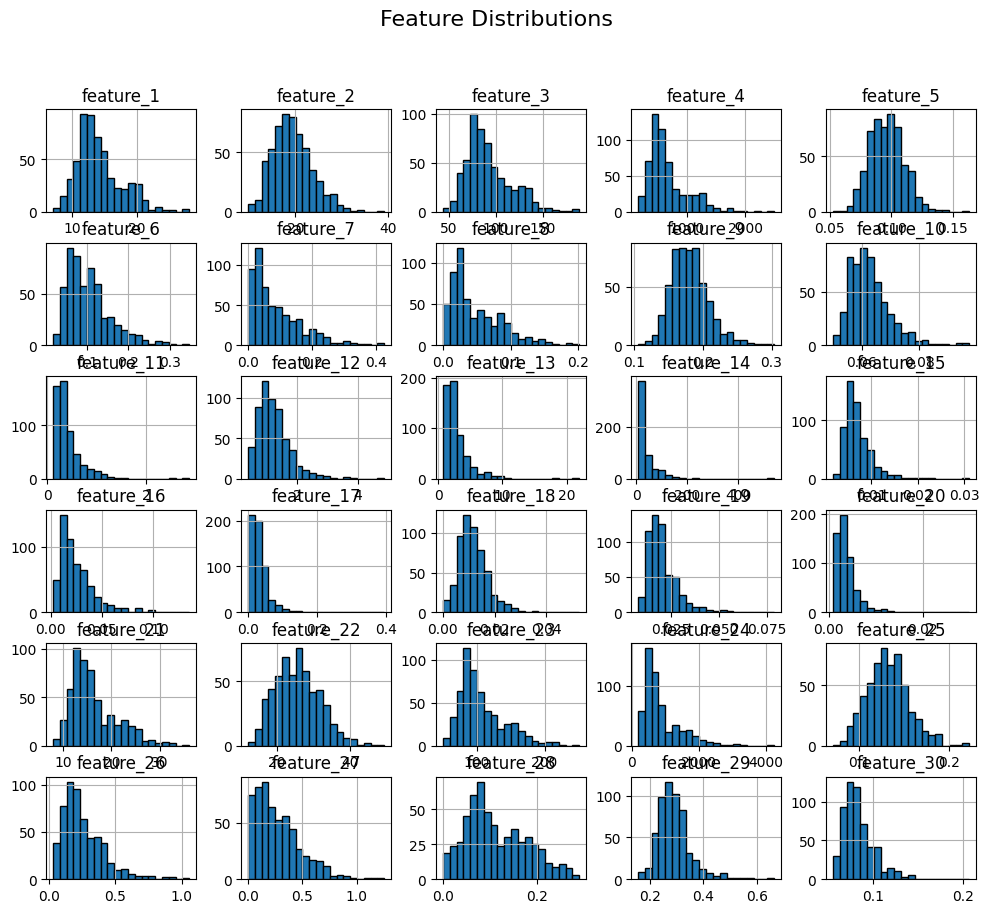

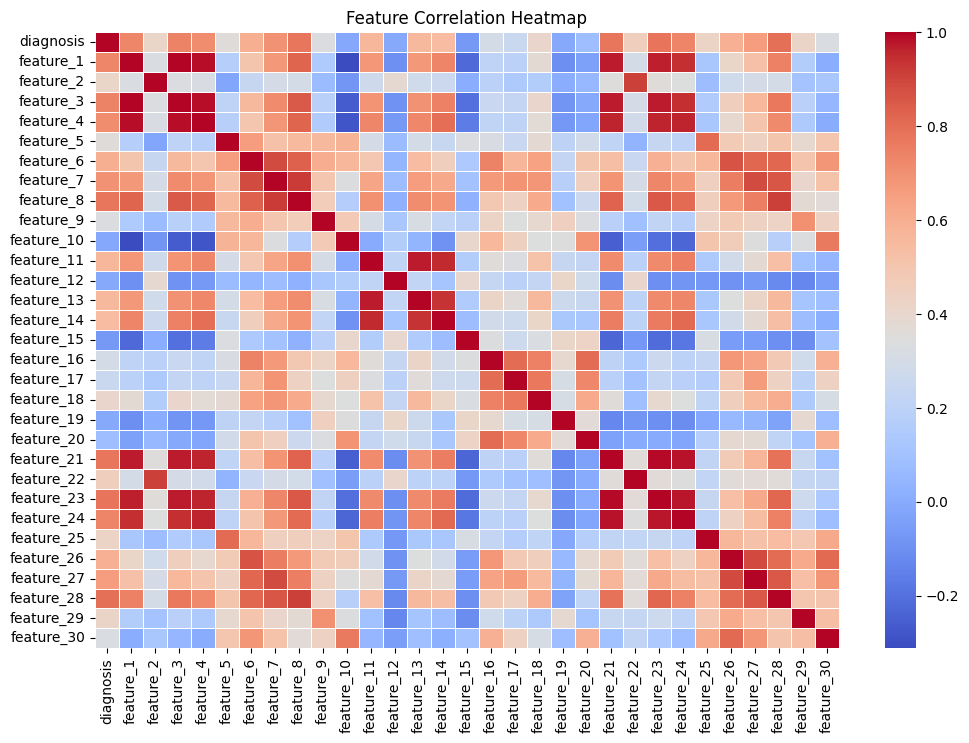

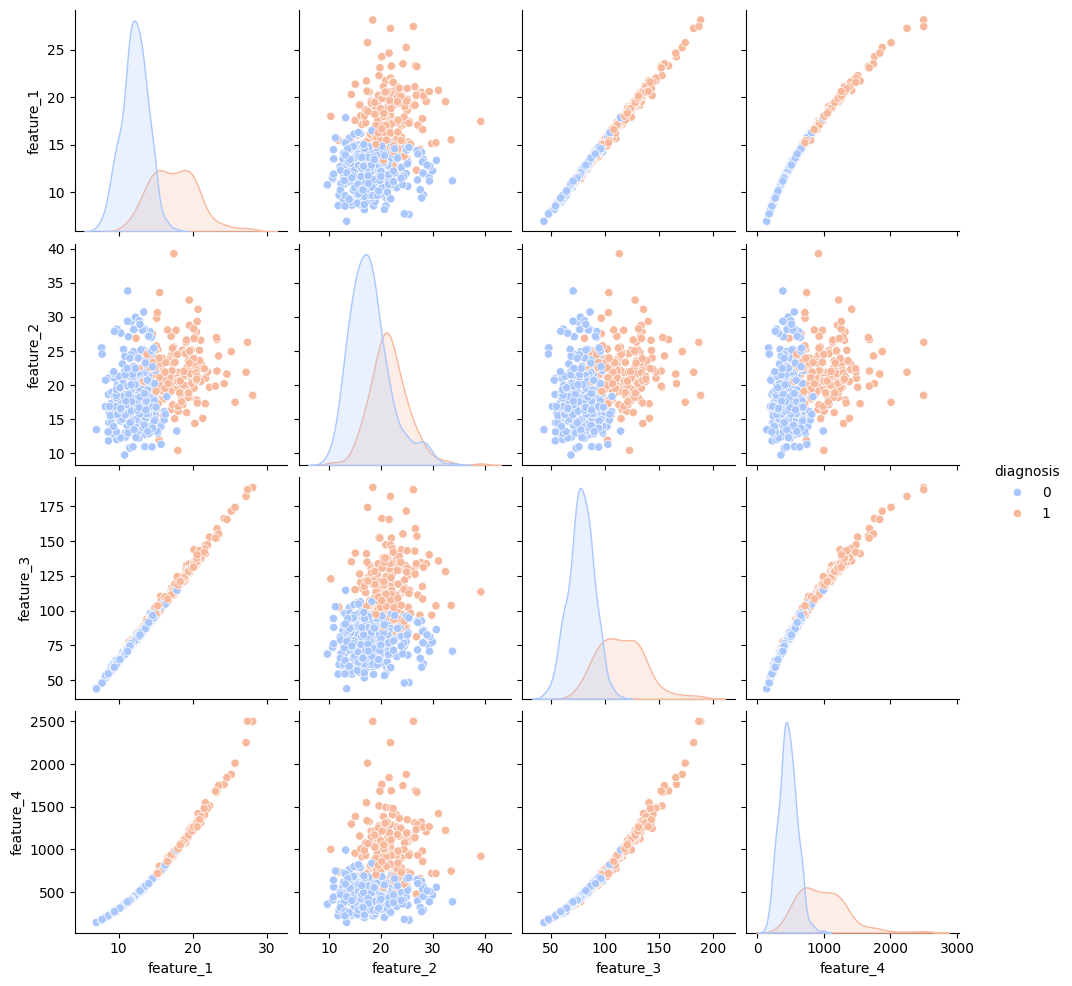

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6167 - loss: 0.6384 - val_accuracy: 0.9474 - val_loss: 0.4638
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8600 - loss: 0.4461 - val_accuracy: 0.9737 - val_loss: 0.2899
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9357 - loss: 0.3097 - val_accuracy: 0.9737 - val_loss: 0.1826
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9578 - loss: 0.2065 - val_accuracy: 0.9825 - val_loss: 0.1244
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9337 - loss: 0.1872 - val_accuracy: 0.9912 - val_loss: 0.0959
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9591 - loss: 0.1445 - val_accuracy: 0.9912 - val_loss: 0.0783
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9480 - loss: 0.1475 - val_accuracy: 0.9912 - val_loss: 0.0710
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9816 - loss: 0.1135 - val_accuracy: 0.9912 - val_loss: 0.0647
Ep

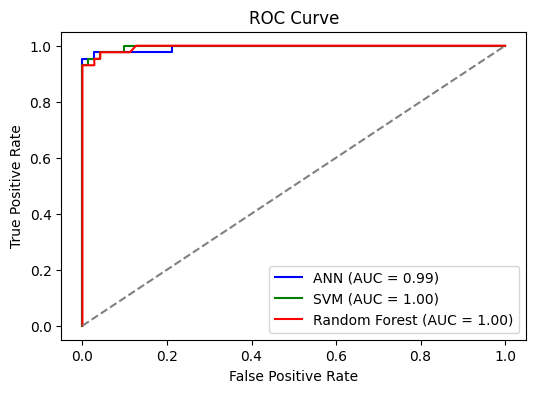

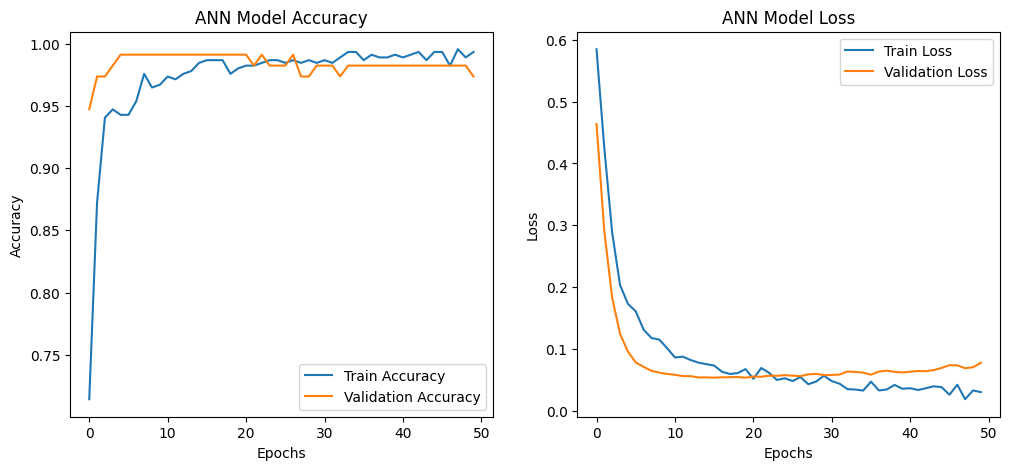

In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset from UCI (Breast Cancer Wisconsin)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, names=columns)

# Drop ID column
data.drop(columns=['id'], inplace=True)

# Encode target variable (M=1, B=0)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
# EDA - Basic Overview
print("Dataset Info:\n", data.info())
print("\nMissing Values:\n", data.isnull().sum().sum())
print("\nClass Distribution:\n", data['diagnosis'].value_counts())

# Class Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, palette='coolwarm')
plt.title('Class Distribution')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()

# Feature Distribution
data.drop(columns=['diagnosis']).hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot for a subset of features
selected_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'diagnosis']
sns.pairplot(data[selected_features], hue='diagnosis', palette='coolwarm')
plt.show()

# Split dataset into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Artificial Neural Network Model ---
# Build the ANN model
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_history = ann_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict with ANN
ann_pred_prob = ann_model.predict(X_test)
ann_pred = (ann_pred_prob > 0.5).astype('int32')

# --- Support Vector Machine Model ---
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict with SVM
svm_pred = svm_model.predict(X_test)
svm_pred_prob = svm_model.predict_proba(X_test)[:, 1]

# --- Random Forest Model ---
rf_model = RandomForestClassifier(n_estimators=80, random_state=42)
rf_model.fit(X_train, y_train)

# Predict with Random Forest
rf_pred = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# --- Evaluate all Models ---
# ANN Evaluation
ann_accuracy = accuracy_score(y_test, ann_pred)
ann_cm = confusion_matrix(y_test, ann_pred)
ann_report = classification_report(y_test, ann_pred)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_pred_prob)
ann_roc_auc = auc(ann_fpr, ann_tpr)

# SVM Evaluation
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_pred_prob)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_prob)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# --- Print Results ---
print("ANN Model Evaluation:")
print(f"Accuracy: {ann_accuracy:.4f}")
print("Confusion Matrix:")
print(ann_cm)
print("Classification Report:")
print(ann_report)

print("\nSVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy:.4f}")
print("Confusion Matrix:")
print(svm_cm)
print("Classification Report:")
print(svm_report)

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Confusion Matrix:")
print(rf_cm)
print("Classification Report:")
print(rf_report)

# --- ROC Curves ---
plt.figure(figsize=(6, 4))

plt.plot(ann_fpr, ann_tpr, color='blue', label=f'ANN (AUC = {ann_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='green', label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='red', label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# --- Plot Training History (ANN) ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ANN Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ANN Model Loss')
plt.show()
